# LSTM Tutorial for SMAP Soil Moisture

This is a tutorial for training and testing a LSTM model for SMAP soil moisture prediction over CONUS.

## Training part

- **Load needed packages**

In [1]:
import sys
sys.path.append('../')
import os
import torch
import numpy as np
from hydroDL.master import default, wrapMaster, train
from hydroDL.data import dbCsv
from hydroDL.post import plot, stat
from hydroDL import master

loading package hydroDL


- **Define training options**

In [2]:
cDir = os.getcwd()
# define training options
optData = default.update(
    default.optDataSMAP,
    rootDB=os.path.join(cDir, 'data'),
    subset='CONUSv4f1',
    tRange=[20150401, 20160401])
if torch.cuda.is_available():
    optModel = default.optLstm
else:
    optModel = default.update(
        default.optLstm,
        name='hydroDL.model.rnn.CpuLstmModel')
optLoss = default.optLossRMSE
optTrain = default.update(
    default.optTrainSMAP, 
    nEpoch=100,
    saveEpoch=50)
out = os.path.join(cDir, 'output', 'CONUSv4f1')
masterDict = wrapMaster(out, optData, optModel, optLoss, optTrain)

- **Train the LSTM model**

In [27]:
train(masterDict)

C:\PhD\Code\grouprepo\hydroDL-dev\example\data\Subset\CONUSv4f1.csv
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2015\SMAP_AM.csv 0.06881594657897949
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2015\APCP_FORA.csv 0.0638284683227539
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2015\DLWRF_FORA.csv 0.07081031799316406
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2015\DSWRF_FORA.csv 0.06482768058776855
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2015\TMP_2_FORA.csv 0.051860809326171875
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2015\SPFH_2_FORA.csv 0.05884122848510742
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2015\VGRD_10_FORA.csv 0.05983901023864746
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2015\UGRD_10_FORA.csv 0.06283020973205566
write master file C:\PhD\Code\grouprepo\hydroDL-dev\example\output\CONUSv4f1\master.json


KeyboardInterrupt: 

## Testing part

**This part is for model test and result plotting. By default the model will be saved in [here](output/CONUSv4f1/).**

 - **Define test option**

In [4]:
out = os.path.join(cDir, 'output', 'CONUSv4f1')
rootDB = os.path.join(cDir, 'data')
nEpoch = 100
tRange = [20160401, 20170401]

 - **Test the model in another year**

In [5]:
df, yp, yt = master.test(
    out, tRange=[20160401, 20170401], subset='CONUSv4f1', epoch=nEpoch, reTest=True)
yp = yp.squeeze()
yt = yt.squeeze()

read master file C:\PhD\Code\grouprepo\hydroDL-dev\example\output\CONUSv4f1\master.json
read master file C:\PhD\Code\grouprepo\hydroDL-dev\example\output\CONUSv4f1\master.json
output files: ['C:\\PhD\\Code\\grouprepo\\hydroDL-dev\\example\\output\\CONUSv4f1\\CONUSv4f1_20160401_20170401_ep5_SMAP_AM.csv']
Runing new results
C:\PhD\Code\grouprepo\hydroDL-dev\example\data\Subset\CONUSv4f1.csv
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2016\SMAP_AM.csv 0.05784177780151367
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2016\APCP_FORA.csv 0.053855180740356445
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2016\DLWRF_FORA.csv 0.06482577323913574
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2016\DSWRF_FORA.csv 0.05983781814575195
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2016\TMP_2_FORA.csv 0.061833858489990234
read C:\PhD\Code\grouprepo\hydroDL-dev\example\data\CONUSv4f1\2016\SPFH_2_FORA.csv 0.052858114242553

 - **Calculate statistic metrics.**

<IPython.core.display.Javascript object>


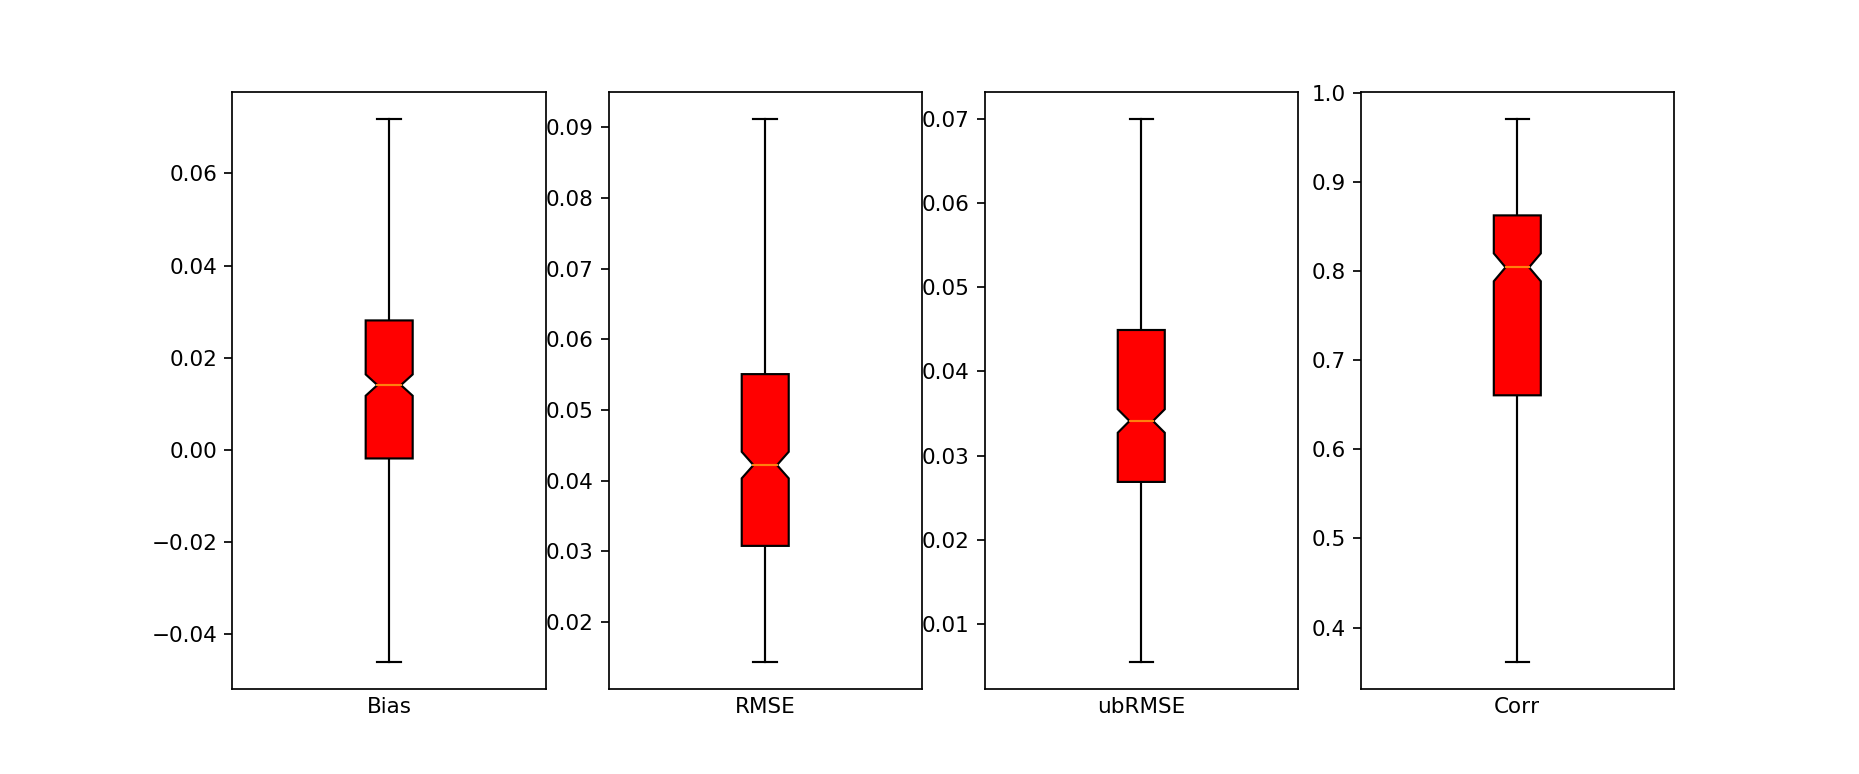

In [6]:
# calculate statistics
statErr = stat.statError(yp, yt)
# Box plots to show the test results
statDictLst = [statErr]
keyLst=['Bias', 'RMSE', 'ubRMSE', 'Corr']
dataBox = list()
for iS in range(len(keyLst)):
    statStr = keyLst[iS]
    temp = list()
    for k in range(len(statDictLst)):
        data = statDictLst[k][statStr]
        data = data[~np.isnan(data)]
        temp.append(data)
    dataBox.append(temp)
%matplotlib notebook
fig = plot.plotBoxFig(dataBox, label1=keyLst, sharey=False, figsize=(12, 5))
fig.patch.set_facecolor('white')
fig.show()

- **Plot an interactive map and users can click on map to show time series of observation and model predictions.**

<IPython.core.display.Javascript object>


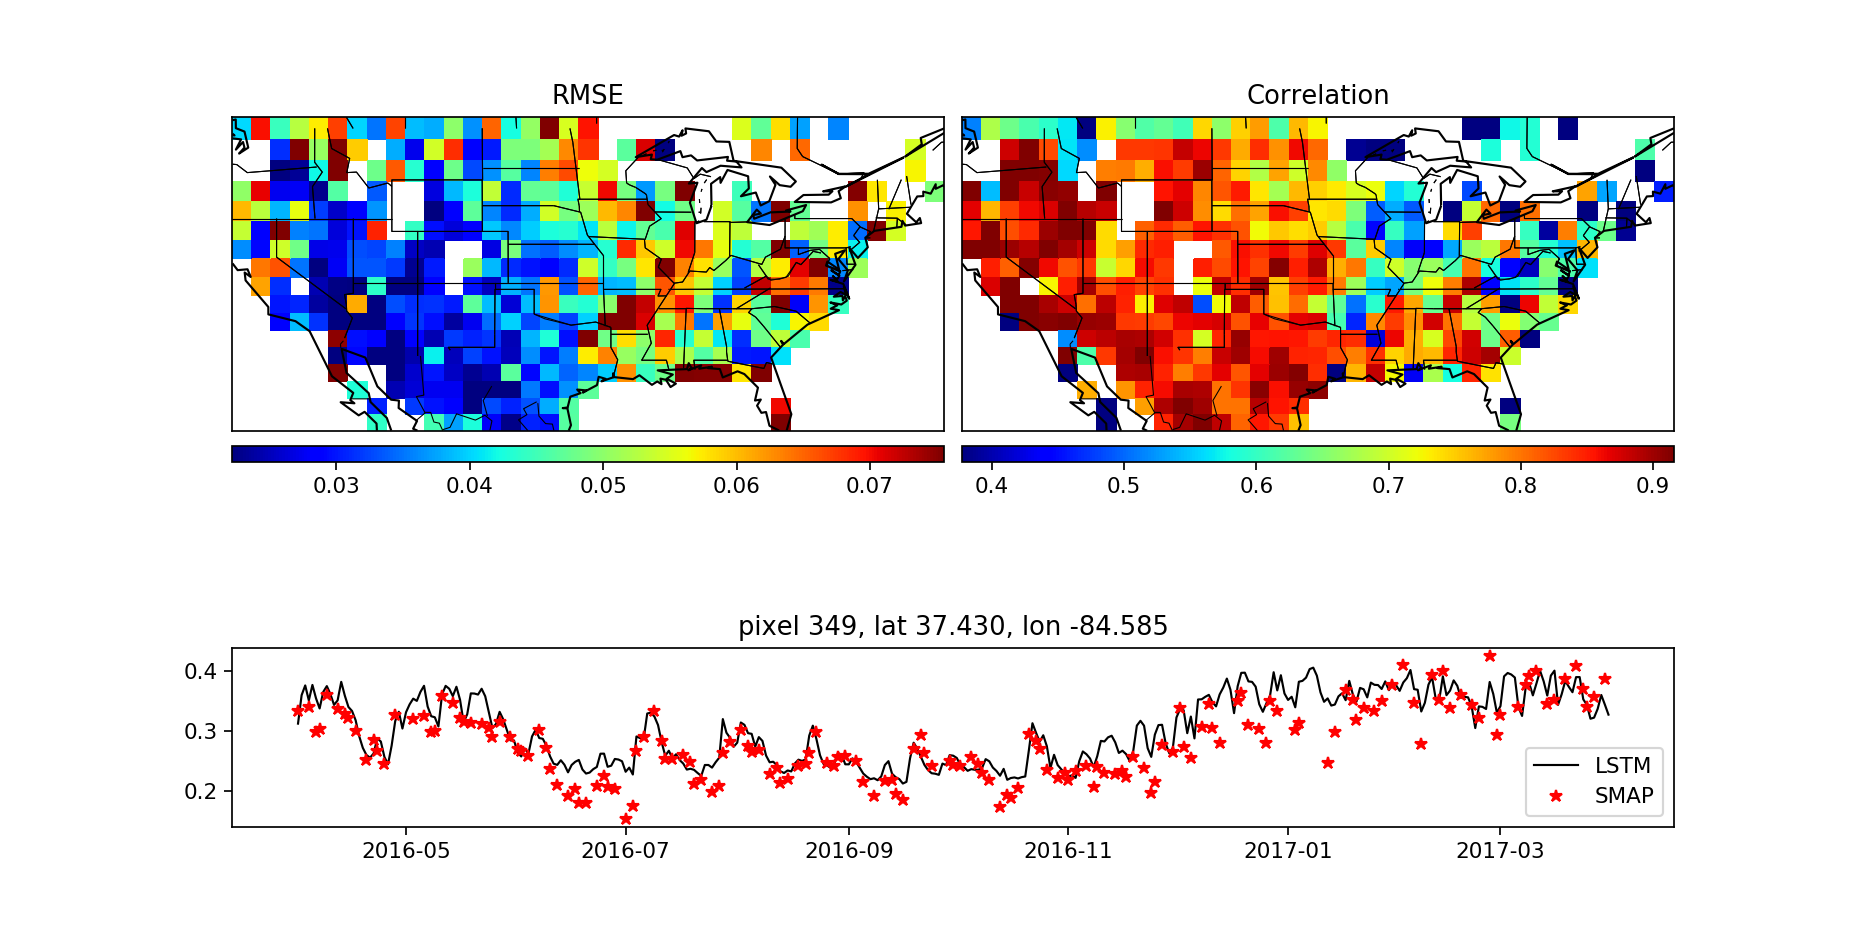

..\hydroDL\post\plot.py:200: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  ax=ax)
..\hydroDL\post\plot.py:202: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  mm.drawstates()
..\hydroDL\post\plot.py:359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [7]:
dataGrid = [statErr['RMSE'], statErr['Corr']]
dataTs = [yp, yt]
t = df.getT()
crd = df.getGeo()
mapNameLst = ['RMSE', 'Correlation']
tsNameLst = ['LSTM', 'SMAP']
colorMap = None
colorTs = None
# plot map and time series
%matplotlib notebook
plot.plotTsMap(
    dataGrid,
    dataTs,
    lat=crd[0],
    lon=crd[1],
    t=t,
    mapNameLst=mapNameLst,
    tsNameLst=tsNameLst,
    isGrid=True)